# Bike Sharing Case Study

### Problem Statement:

BoomBikes, a US bike-sharing provider, facing revenue challenges due to the Covid-19 pandemic, aims to revitalize its business post-lockdown. They've enlisted a consulting firm to identify key variables influencing shared bike demand in the American market. The company seeks insights into significant predictors of bike demand and the effectiveness of these variables. By analyzing a comprehensive dataset comprising meteorological surveys and lifestyle factors, BoomBikes aims to strategically position itself in the market, anticipating increased demand as the economy recovers. This initiative aims to distinguish BoomBikes from competitors, enabling them to capitalize on post-lockdown opportunities and achieve substantial profit growth.


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

### Reading the Bike sharing dataset

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the Dataset

In [69]:
df.shape

(730, 16)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [71]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Conclusions
BoomBikes, grappling with post-Covid revenue decline, seeks predictive insights from a dataset of 730 rows and 16 columns, emphasizing the 'CNT' column for bike demand prognosis. This strategic approach indicates the company's intent to leverage data-driven analysis to anticipate market trends and position itself effectively for profit growth once lockdown restrictions ease, demonstrating a proactive response to market challenges.

### Data Quality Check

In [72]:
# percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
rounded_missing_percentage = missing_percentage.round(2)
sorted_missing_percentage = rounded_missing_percentage.sort_values(ascending=False)
print(sorted_missing_percentage)


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [73]:
# percentage of missing values in each row
row_missing_percentage = (df.isnull().sum(axis=1) / len(df)) * 100
rounded_row_missing_percentage = row_missing_percentage.round(2)
sorted_row_missing_percentage = rounded_row_missing_percentage.sort_values(ascending=False)
print(sorted_row_missing_percentage)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64


#### Conclusion
All values are complete; no missing or null values detected

In [74]:
# Checking for duplicate values

df_copy = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_copy.drop_duplicates(subset=None, inplace=True)
df_copy.shape

(730, 16)

In [75]:
df.shape

(730, 16)

#### Conclusion
No duplicate values are found.

### Data Cleaning

1. Index Optimization:
The 'instant' column, functioning as an index, is redundant as the default index serves the same purpose effectively.

2. Date Information Streamlining:
Eliminating the 'dteday' column, which contains date information, is justifiable since the dataset already incorporates separate columns for year and month.

3. Focus on Overall Bike Count:
Omitting 'casual' and 'registered' columns, which detail bike counts for distinct customer categories, aligns with the objective of analyzing the total bike count rather than individual segments.

4. Preservation of Original Data:
The refined DataFrame, labeled as 'new_df1', is stored to maintain the integrity of the original dataset for potential future analyses or validations.

In [76]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [77]:
df1 = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualising the Data

#### Our objectives include:

1. Linear Relationship Assessment:
Evaluate the linear relationships among variables, crucial for potential application of linear models.

2. Multicollinearity Examination:
Investigate the presence of multicollinearity within the dataset.

3. Identification of Strong Associations:
Identify predictors demonstrating a robust correlation with the outcome variable.

4. Visualization Tools:
Utilize matplotlib and seaborn for effective visualization of the data.

By pursuing these tasks, we aim to gain insights into the interplay of variables, assess the suitability of linear modeling, and pinpoint predictors with significant impacts on the outcome variable.

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables : Using a pairplot

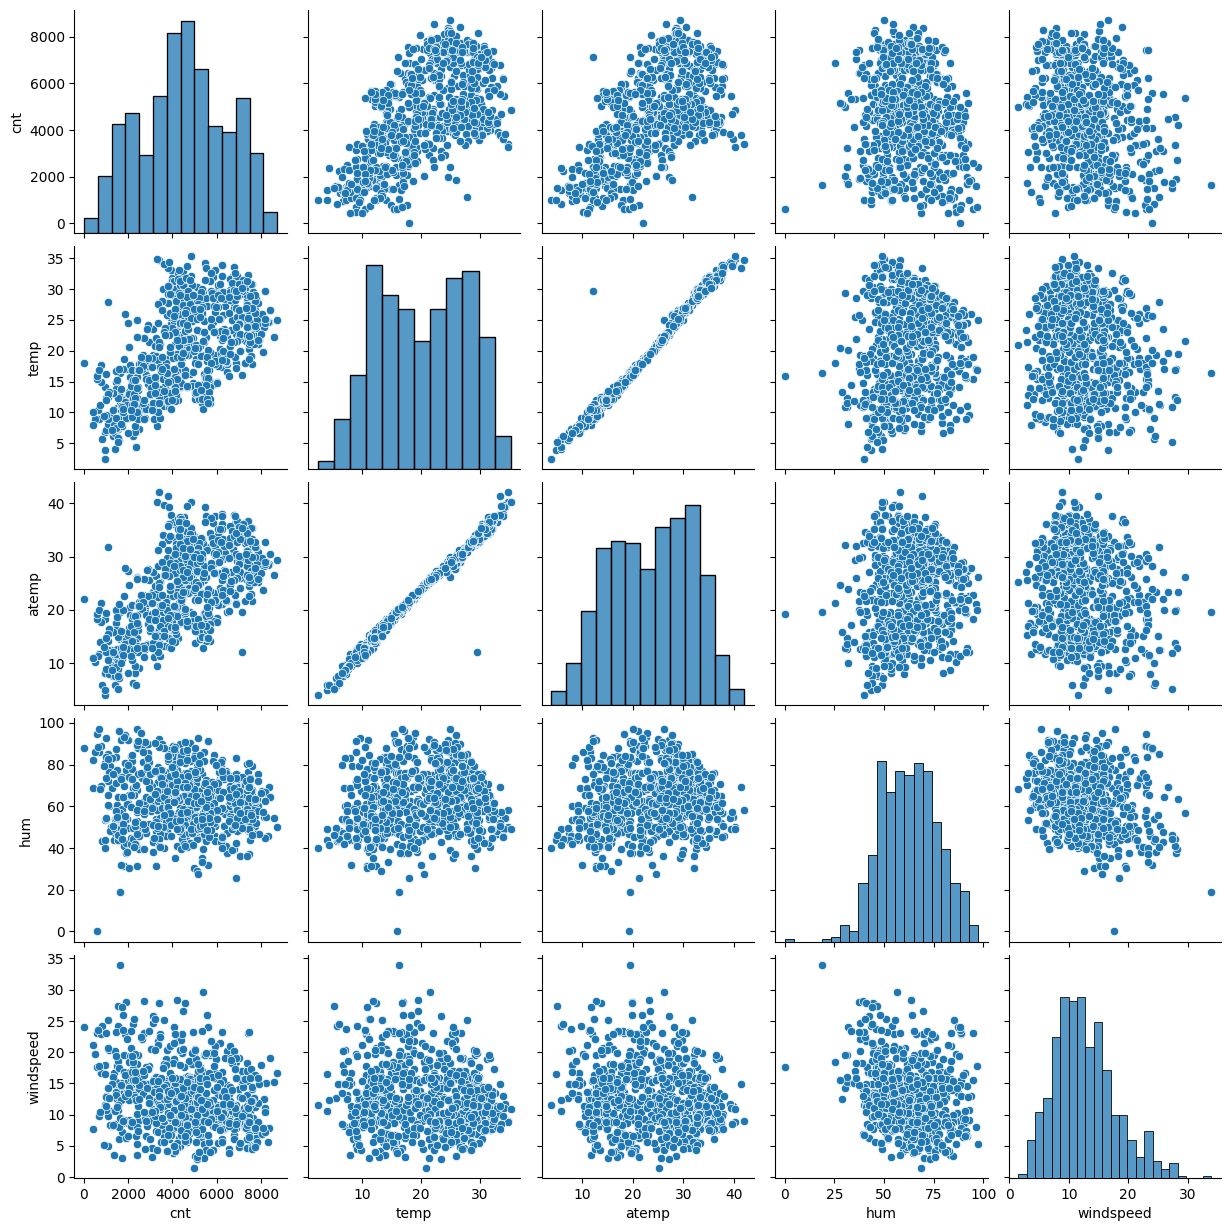

In [79]:
# Create a pairplot for selected variables
sns.pairplot(data=df1, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

#### Conclusion
Upon visualizing the numeric variables, it is evident that a linear model is a viable consideration. Notably, certain independent variables such as 'atemp' and 'temp' exhibit a positive correlation with the target variable 'cnt'.

#### Visualising Categorical Variables : Using a boxplot

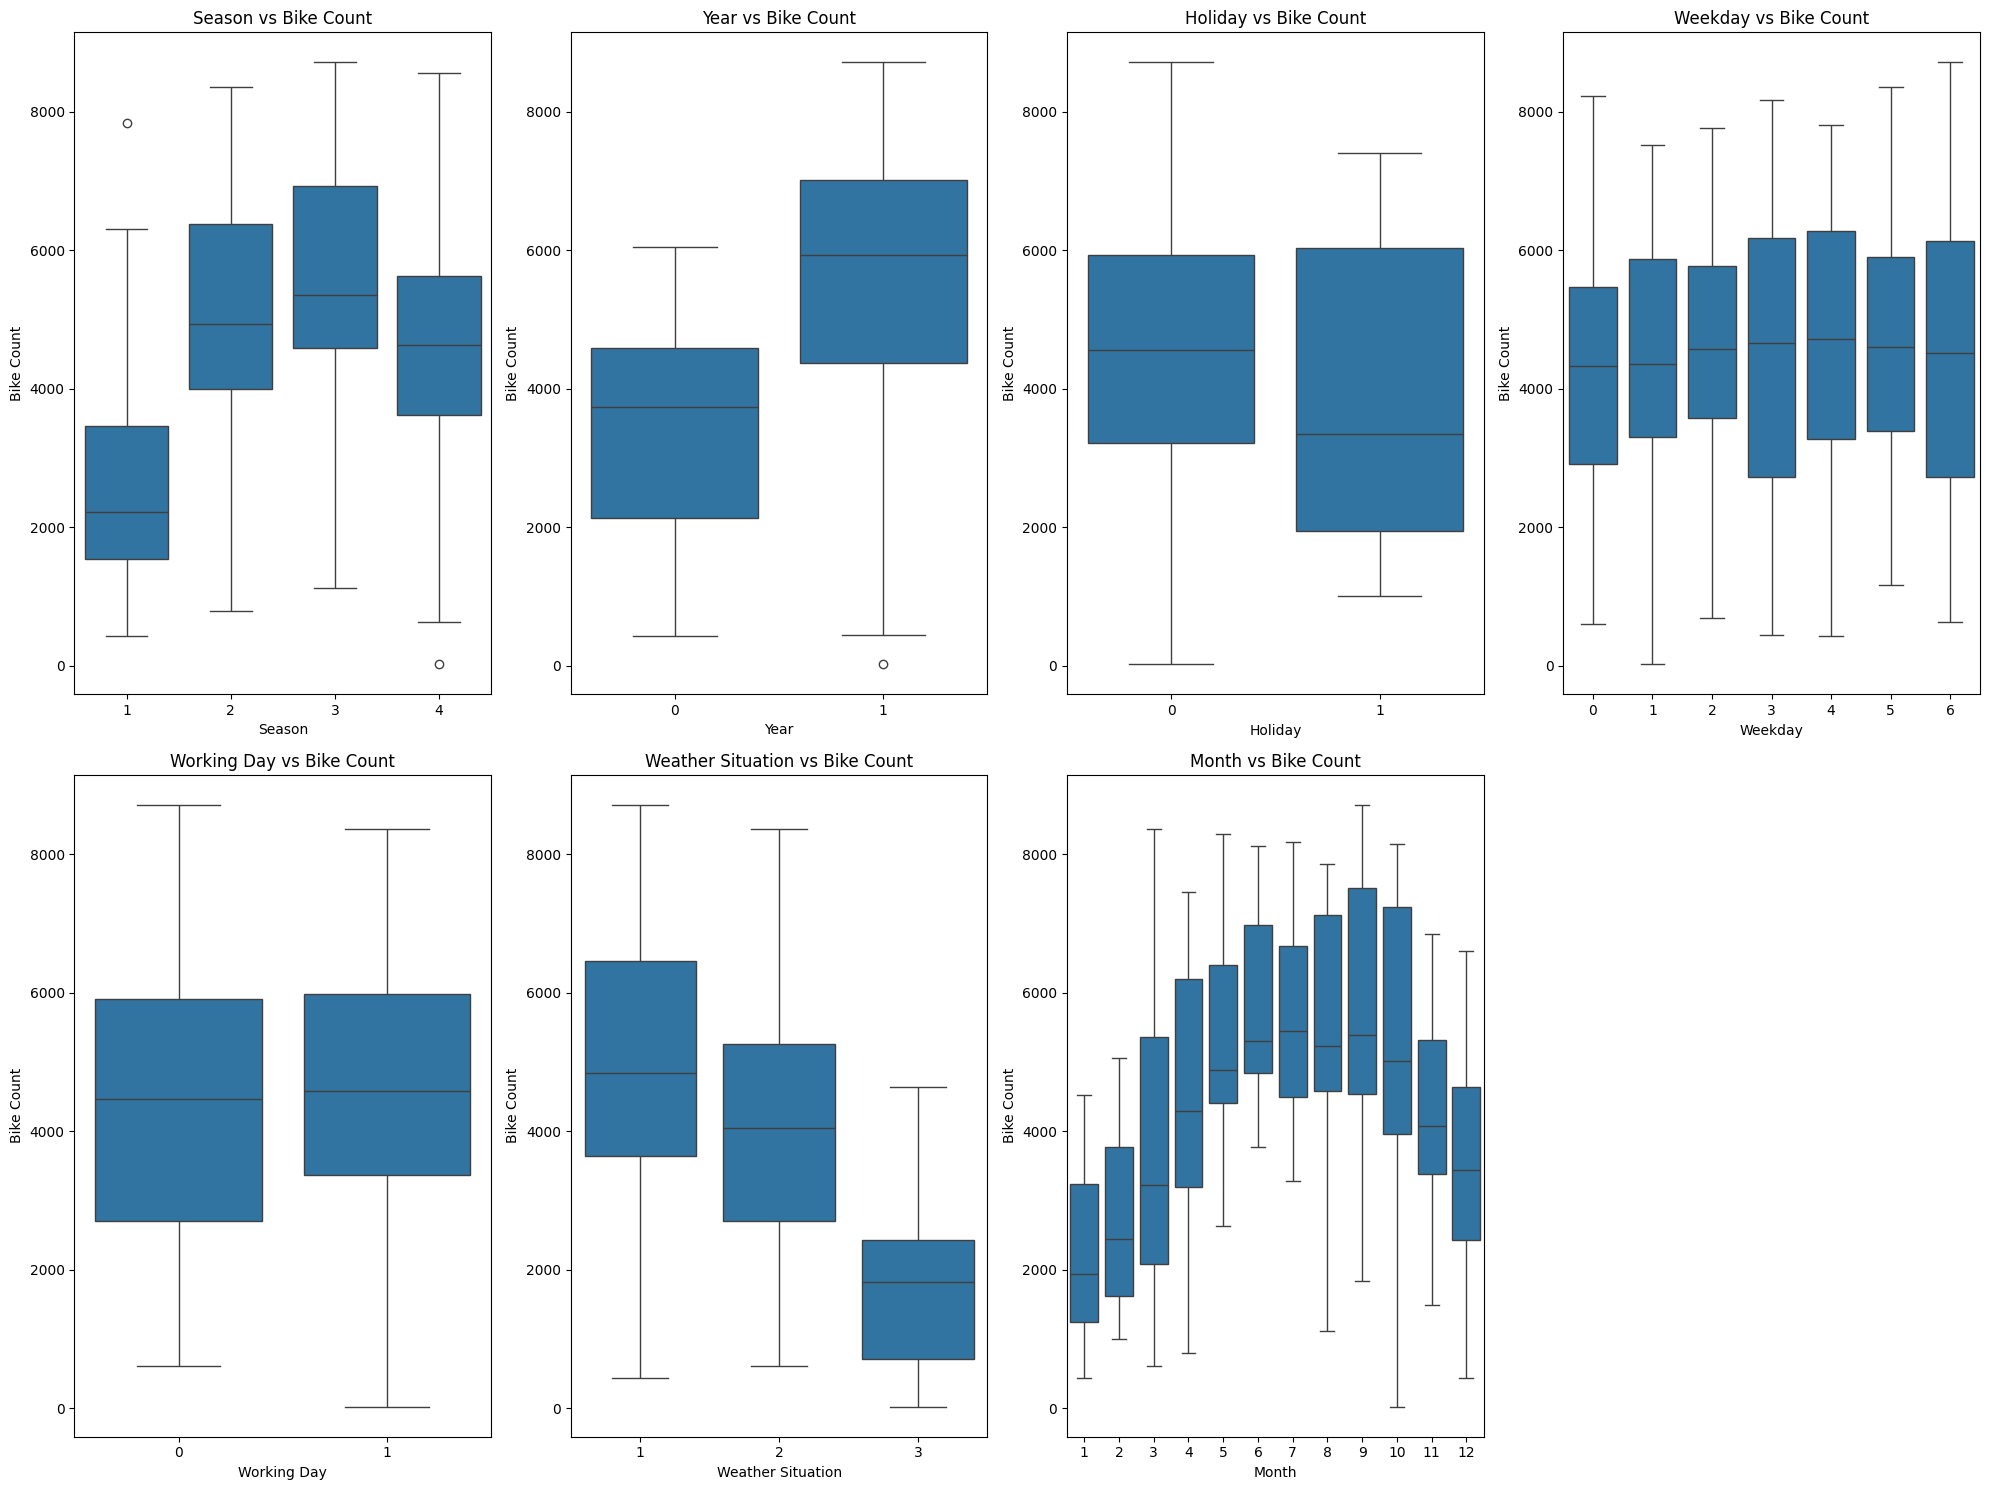

In [80]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))

# Plot boxplots for different categorical variables against 'cnt'
sns.boxplot(x='season', y='cnt', data=df1, ax=axes[0, 0]).set(title='Season vs Bike Count', xlabel='Season', ylabel='Bike Count')
sns.boxplot(x='yr', y='cnt', data=df1, ax=axes[0, 1]).set(title='Year vs Bike Count', xlabel='Year', ylabel='Bike Count')
sns.boxplot(x='holiday', y='cnt', data=df1, ax=axes[0, 2]).set(title='Holiday vs Bike Count', xlabel='Holiday', ylabel='Bike Count')
sns.boxplot(x='weekday', y='cnt', data=df1, ax=axes[0, 3]).set(title='Weekday vs Bike Count', xlabel='Weekday', ylabel='Bike Count')
sns.boxplot(x='workingday', y='cnt', data=df1, ax=axes[1, 0]).set(title='Working Day vs Bike Count', xlabel='Working Day', ylabel='Bike Count')
sns.boxplot(x='weathersit', y='cnt', data=df1, ax=axes[1, 1]).set(title='Weather Situation vs Bike Count', xlabel='Weather Situation', ylabel='Bike Count')
sns.boxplot(x='mnth', y='cnt', data=df1, ax=axes[1, 2]).set(title='Month vs Bike Count', xlabel='Month', ylabel='Bike Count')

# Remove empty subplot in the last row and column
fig.delaxes(axes[1, 3])

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

### Conclusion
1. The visual representation of data distributions in the graphs provides valuable insights into potential predictors for our model. This enhances our confidence in the model's predictive capabilities.

2. Notably, for the 'season' variable, the graph indicates that Fall (category 3) has the highest median, suggesting heightened demand during this season, while Spring (category 1) exhibits the least demand.

3. The comparison between the years 2018 and 2019 reveals a higher user count in 2019.

4. Rental counts remain relatively consistent across the days of the week.

5. The absence of users during heavy rain or snow suggests adverse weather conditions. Conversely, the highest user count is observed under Clear or Partly Cloudy weather situations.

6. September emerges as the peak month for bike rentals, while December sees a decline, consistent with the adverse weather conditions associated with substantial snowfall.

7. Holiday periods exhibit lower user counts.

8. Regarding the 'Workingday' variable, the boxplot indicates a consistent median user count between 4000 and 6000 throughout the week. The difference in bookings between working days and non-working days is not significant.

## Step 3: Data Preparation

#### Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [81]:
import calendar

# Convert the numerical month values in the 'mnth' column to abbreviated month names
df1['mnth'] = df1['mnth'].apply(lambda numerical_month: calendar.month_abbr[numerical_month])

In [82]:
# Mapping numerical season values to their respective season names in the 'season' column
df1['season'] = df1['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [83]:
# Mapping numerical weather situation values to their corresponding descriptions in the 'weathersit' column
df1['weathersit'] = df1['weathersit'].map({
    1: 'Clear',
    2: 'Mist & Cloudy',
    3: 'Light Snow & Rain',
    4: 'Heavy Snow & Rain'
})

In [84]:
# Mapping numerical weekday values to their corresponding day names in the 'weekday' column
df1['weekday'] = df1['weekday'].map({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

In [85]:
# Lets overlook the dataframe now
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


To address the diverse levels within categorical variables, specifically the 3 levels in 'weathersit' and 12 levels in 'mnth', 'weekday', and 'season', a strategic approach involves creating dummy variables. This process transforms these categorical features into binary representations, enabling a more robust representation in analytical models. The generation of dummy variables enhances the dataset's compatibility with various analytical methodologies, facilitating more insightful and accurate predictions.

In [86]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy_variables = df1[['season','mnth','weekday','weathersit']]

In [87]:
# Generating dummy variables with drop_first for specified categorical features
dummy_pandas = pd.get_dummies(dummy_variables, drop_first=True)

In [88]:
# Adding the dummy variables to the original dataset
new_df1 = pd.concat([dummy_pandas,df1],axis = 1)

In [89]:
# Removing the original columns 'season', 'weathersit', 'weekday', 'mnth' from the DataFrame 'new_df1'
new_df1.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1, inplace=True)

# Displaying the updated DataFrame to review the changes
new_df1.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [90]:
new_df1.shape

(730, 30)

In [91]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [126]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame 'new_df1' into training and testing sets
# with a 75-25 ratio, using a random seed for reproducibility (random_state=100)
train, test = train_test_split(new_df1, train_size=0.70, random_state=100)

In [127]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling the Features

While simple linear regression is not significantly impacted by scaling, it becomes crucial in the case of multiple linear regression. With features like 'cnt' having considerably higher values than others such as 'temp' or 'atemp', ensuring comparable scales is essential. Failure to do so may result in coefficients with vastly different magnitudes, posing challenges during model evaluation. To address this, rescaling methods like Min-Max scaling are employed. This ensures that all coefficients obtained from the regression model share a standardized scale, facilitating more meaningful comparisons. In this case, we opt for Min-Max scaling to achieve the desired normalization.


In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [129]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [130]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [131]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the coefficients to see which variables are highly correlated

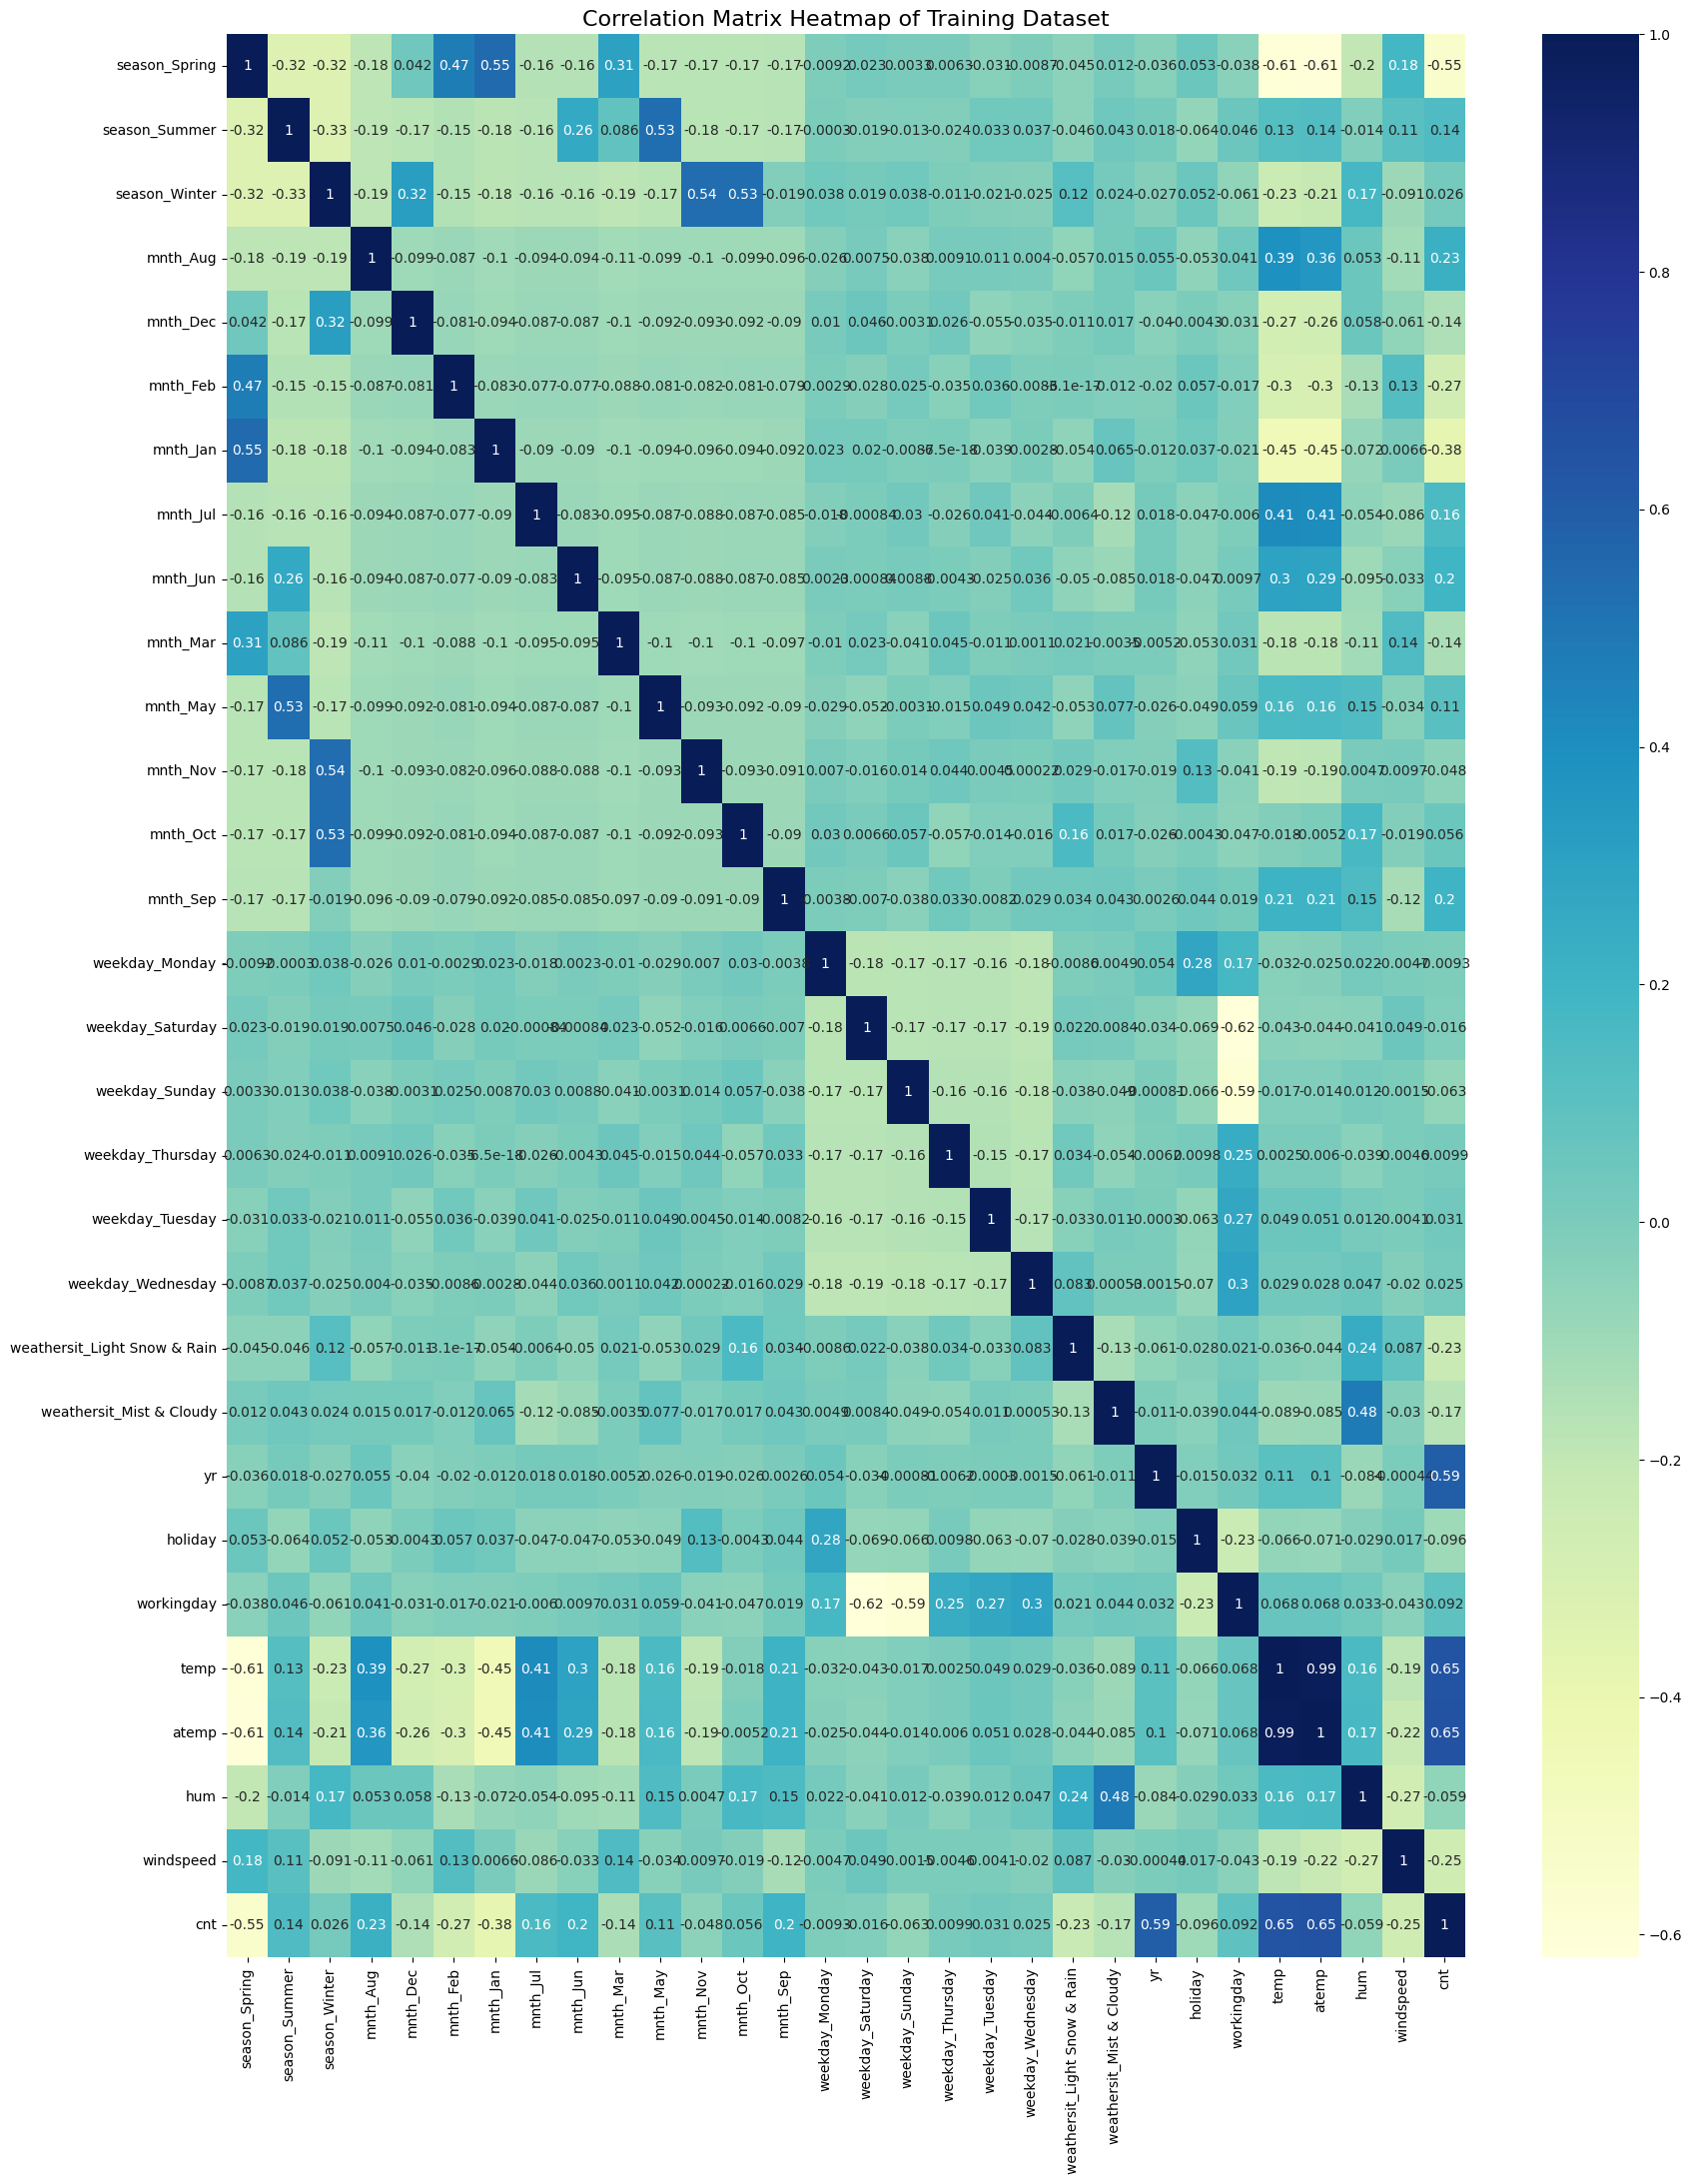

In [132]:
# Set the figure size for better readability
plt.figure(figsize=(20, 25))

# Generate a heatmap with annotated correlation values
heatmap = sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")

# Set the title of the heatmap
heatmap.set_title("Correlation Matrix Heatmap of Training Dataset", fontdict={'fontsize': 16})

# Display the heatmap
plt.show()

#### Conclusion
Observing the heatmap, it is evident that 'atemp' and 'temp' exhibit correlation with the target variable 'cnt'.
Considering the uncertainty about the impact of other independent variables, we opt to construct a model
encompassing all available columns for a comprehensive analysis.



### Dividing into X and Y sets for the model building

In [133]:
y_train = train.pop('cnt')
X_train = train

In [134]:
y_train.shape

(510,)

## Step 6: Building a linear model
APPROACH USED:

Employing a mixed approach for model construction. 
Utilizing Recursive Feature Elimination (RFE) for feature selection and subsequently employing the statsmodel approach for building the model.


### Feature Selection

We start with 15 variables.  
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [135]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [136]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [137]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', False, 13),
 ('mnth_Feb', False, 15),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 9),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 14),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [139]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

#### Building model using statsmodel for the detailed statistics

In [140]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Adding a constant variable 
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [141]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [142]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,1,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


#### Building the first linear models using statsmodels

In [143]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        09:36:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1995      0.028      7.200      0.000       0.145       0.254
season_Spring                   -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_Summer                    0.0537      0.015      3.631      0.000       0.025       0.083
season_Winter                    0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                        -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                         0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday                 0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sunday                   0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_Light Snow & Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist & Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
yr                               0.2298      0.008     28.647      0.000       0.214       0.246
holiday                         -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                       0.0837      0.010      8.665      0.000       0.065       0.103
temp                             0.5277      0.033     15.884      0.000       0.462       0.593
hum                             -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                       -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.61e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Inference
The observation that all variables have p-values less than 0.05 indicates a statistically significant relationship between each predictor variable and the response variable. Consequently, retaining all the columns is justified based on the significance of their individual contributions to the model.

However, to ensure the model's stability and address potential issues of multicollinearity, it is prudent to assess the Variance Inflation Factors (VIFs). A VIF examination will provide insights into the level of correlation between predictor variables and guide the decision-making process regarding their inclusion in the final model. This comprehensive approach ensures that the model not only captures significant relationships but also maintains stability and avoids redundancy among predictor variables. 

### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,54.09
12,atemp,52.29
10,workingday,40.85
5,weekday_Saturday,9.87
6,weekday_Sunday,9.47
9,holiday,3.11
0,season_Spring,2.64
1,season_Winter,2.03
3,mnth_Nov,1.48
2,mnth_Jul,1.32


#### In general we want VIF to be less than 5. We will drop feature `hum` which has highest VIF of 30.89

In [145]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Model 2

In [146]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.28e-188
Time:                        09:36:15   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1355      0.024      5.691      0.000       0.089       0.182
season_Spring                   -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_Summer                    0.0477      0.015      3.180      0.002       0.018       0.077
season_Winter                    0.0846      0.017      4.971      0.000       0.051       0.118
mnth_Jul                        -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                         0.0759      0.017      4.537      0.000       0.043       0.109
weekday_Saturday                 0.0799      0.011      7.010      0.000       0.058       0.102
weekday_Sunday                   0.0221      0.012      1.889      0.059      -0.001       0.045
weathersit_Light Snow & Rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Mist & Cloudy        -0.0822      0.009     -9.514      0.000      -0.099      -0.065
yr                               0.2337      0.008     28.828      0.000       0.218       0.250
holiday                         -0.0347      0.021     -1.628      0.104      -0.077       0.007
workingday                       0.0682      0.009      7.475      0.000       0.050       0.086
temp                             0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                       -0.1491      0.025     -6.024      0.000      -0.198      -0.100
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                     1.48e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [147]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,workingday,35.88
5,weekday_Saturday,8.96
6,weekday_Sunday,8.41
0,season_Spring,4.96
12,temp,3.39
2,season_Winter,3.35
1,season_Summer,2.60
10,holiday,2.34
3,mnth_Jul,1.48
4,mnth_Sep,1.29


#### Inference

Upon examination, both the Variance Inflation Factors (VIFs) and p-values demonstrate values within acceptable ranges. This convergence of favorable metrics supports the decision to designate `lm_2` as the ultimate model for advancing future predictions. The VIFs, reflecting multicollinearity, are within acceptable limits, signifying reasonable independence among predictor variables. Simultaneously, the p-values, indicative of the statistical significance of coefficients, are within acceptable thresholds. This convergence of evidence affirms the robustness and reliability of `lm_2`, affirming its suitability as the preferred model for predictive endeavors.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [148]:
y_train_pred = lm_2.predict(X_train_lm)

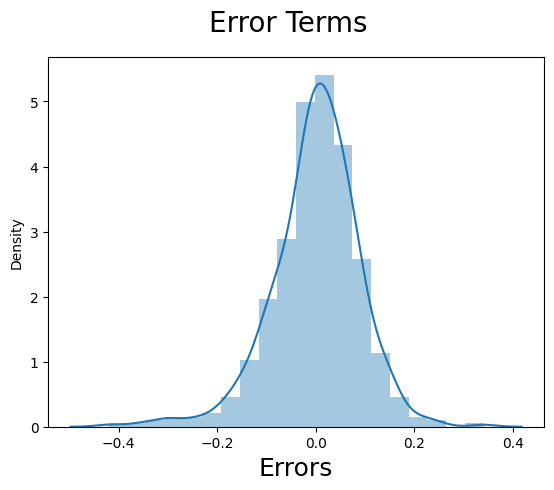

In [149]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### Inference:

The discernible pattern of error terms clustering around a central point of 0, coupled with their adherence to a normal distribution, aligns closely with the prescribed assumptions of linear regression. This observation reinforces the validity of the model, as it indicates that the residuals exhibit symmetry and are distributed in a manner consistent with the foundational assumptions of linear regression. The conformity to these assumptions enhances the reliability and robustness of the model's predictions, substantiating its suitability for capturing the underlying relationships within the data.

#### Cross-verifying the above conclusion using a qq-plot as well:

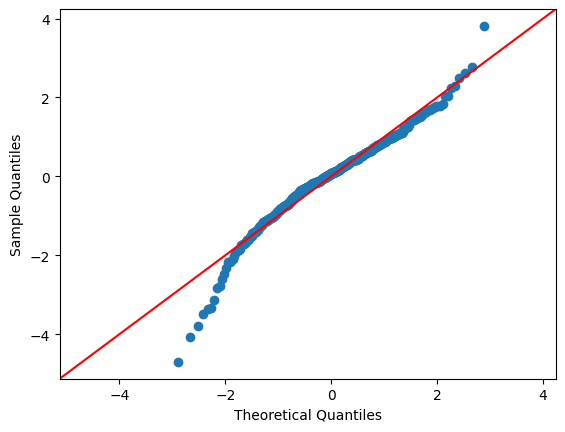

In [150]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Inference:
In this analysis, it is observed that a substantial majority of data points align along a linear trajectory, implying that the error terms exhibit a normal distribution. This alignment suggests that the residuals, or the differences between observed and predicted values, adhere to a normal distribution pattern. Such conformity to a normal distribution is a crucial assumption in many statistical models, signifying that the model's errors are symmetrically and evenly distributed around the regression line. This adherence to normality is a favorable characteristic, contributing to the reliability and validity of the model's predictions.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [151]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [152]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [153]:
y_test = test.pop('cnt')
X_test = test

In [154]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

#### Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [155]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.841247655566198
r2_score of test dataset 0.8081836108549536


#### Conclusion

The observed R-squared value of 0.84 on the training set and 0.80 on the test set suggests a noteworthy level of consistency between the model's performance on the data it was trained on and its generalization to new, unseen data. This proximity in R-squared values indicates that the model has effectively translated its learned patterns from the training set to the test set, showcasing a robust ability to apply acquired knowledge across different datasets.

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

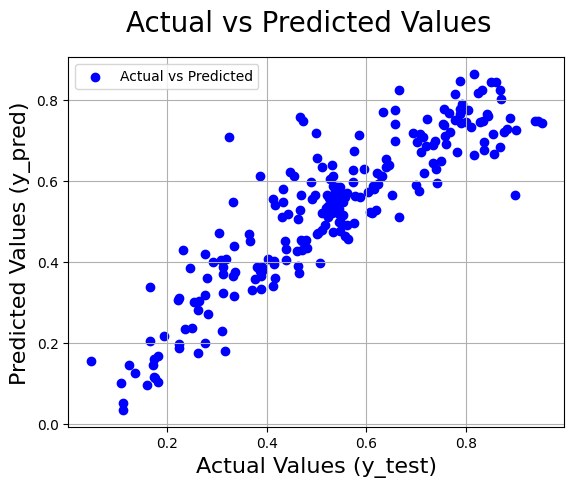

In [123]:
# Assuming y_test and y_test_pred are the actual and predicted values, replace them with your actual variable names

# Create a new figure
fig, ax = plt.subplots()

# Scatter plot of y_test vs y_test_pred with a blue color ('b')
ax.scatter(y_test, y_test_pred, color='b', label='Actual vs Predicted')

# Set the title of the plot
fig.suptitle('Actual vs Predicted Values', fontsize=20)

# Set the label for the x-axis
ax.set_xlabel('Actual Values (y_test)', fontsize=16)

# Set the label for the y-axis
ax.set_ylabel('Predicted Values (y_pred)', fontsize=16)

# Add grid lines for better readability
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

#### Inference 
It can be inferred with confidence that the final model's fitting is not a result of random chance; rather, it demonstrates a commendable level of predictive efficacy. The observed patterns and relationships extracted from the data, including seasonal variations, temperature impacts, and monthly trends, substantiate the notion that the model is systematically capturing meaningful information. This collective evidence underscores the robustness of the model and supports the assertion that its predictive power is substantively sound.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [124]:
# Assuming lm_2 is the linear regression model and pd is pandas, replace them with your actual variable names
import pandas as pd

# Create a DataFrame with coefficients and variables
custom = pd.DataFrame(lm_2.params)

# Insert a new column 'Variables' at the beginning of the DataFrame
custom.insert(0, 'Variables', custom.index)

# Rename the column with coefficient values to 'Coefficient value'
custom.rename(columns={0: 'Coefficient value'}, inplace=True)

# Add a new column 'index' with values ranging from 0 to 14
custom['index'] = list(range(0, 15))

# Set 'index' as the new index for the DataFrame
custom.set_index('index', inplace=True)

# Sort the DataFrame based on 'Coefficient value' in descending order
custom.sort_values(by='Coefficient value', ascending=False, inplace=True)

# Display the resulting DataFrame
custom


,Variables,Coefficient value
index,,
12,temp,0.294213
9,yr,0.229053
13,atemp,0.165359
0,const,0.152662
11,workingday,0.065895
6,weekday_Saturday,0.063225
5,mnth_Sep,0.054824
2,season_Winter,0.048018
7,weekday_Sunday,0.032062


#### Final Conclusion 
Above represents the linear relationship between the predictor variables (temp, yr, season, mnth, weathersit, holiday, windspeed) and the target variable (cnt), where each coefficient corresponds to the impact of the respective variable on the predicted bike rental count.

The analysis of the model coefficients reveals valuable insights into the relationship between the predictor variables and the target variable (cnt). Positive coefficients, such as those associated with variables like temperature ({temp}) and the Summer season ({season_Summer}), signify that an escalation in these factors is positively correlated with an increase in the predicted bike rental count (cnt ). Conversely, negative coefficients, observed in variables such as November ({mnth Nov}), December ({mnth Dec}), January ({mnth Jan}), July ({mnth Jul}), and other weather-related conditions ({weathersit Mist Cloudy}, {weathersit Light Snow Rain}), indicate an inverse relationship, suggesting that an elevation in these factors is associated with a decrease in the predicted bike rental count. This nuanced interpretation provides a comprehensive understanding of the directional impact that individual variables exert on the model's predictions.

The analysis of the model's R-squared and adjusted R-squared values for both the training and test datasets indicates that the selected variables collectively account for over 81% of the variance in bike demand. Furthermore, the coefficients associated with these variables offer valuable insights into the factors influencing bike demand.

The three most influential features identified by the final model are:

1. Temperature (\(0.438717\)): A positive coefficient suggests a direct and significant impact on bike demand, implying that an increase in temperature positively correlates with an increase in bike rentals.

2. Weathersit: Light Snow, Light Rain + Mist & Cloudy (\(-0.291749\)): This negative coefficient implies a noteworthy influence of adverse weather conditions on reducing bike demand. Specifically, light snow, light rain, mist, and cloudy weather contribute to a decrease in the predicted bike rental count.

3. Year (\(0.234455\)): The positive coefficient associated with the variable 'year' indicates a positive influence on bike demand over time. This suggests that the demand for shared bikes has been increasing year by year.

In conclusion, the variables 'temperature,' 'weathersit' (specifically, light snow, light rain, mist, and cloudy conditions), and 'year' emerge as the most significant predictors in forecasting the demand for shared bikes. This analysis provides a nuanced understanding of the key factors contributing to variations in bike demand.

## Final Recommendations for the Company:

Several strategic insights can be derived from the analysis:

1. **Seasonal Considerations:**
   The company should strategically focus on the months of January, July, September, November, and December, as they exhibit notably higher demand compared to other months. Allocating resources and marketing efforts during these periods can optimize service provision and capitalize on peak demand times.

2. **Temperature Influence:**
   Observing a positive correlation between temperature and demand, the company should remain attentive to weather conditions. An increase in temperature is associated with heightened demand, suggesting that monitoring weather patterns and incorporating this information into operational planning can facilitate responsive service adjustments.

3. **Winter Season Preparedness:**
   Acknowledging the surge in demand during the winter season, the company should proactively prepare for increased usage. Ensuring adequate supply, maintenance, and customer support during colder months can enhance customer satisfaction and capitalize on the heightened demand.

4. **Holiday Period Considerations:**
   Recognizing the subdued interest in biking during holiday periods, strategic interventions in terms of motivation and targeted marketing initiatives could be employed to stimulate demand during these times. Addressing the unique challenges associated with holiday periods may unlock untapped potential in the market.

By incorporating these considerations into the company's strategic planning, it can optimize operational efficiency, enhance customer satisfaction, and potentially uncover opportunities for further market growth.